# _Gold Price Prediction Using Machine Learning with Python_

<img src='../data/Machine-Learning-Tutorial-on-Gold-Price-Prediction.webp'>

## 📌 _Proje Açıklaması_
_Bu proje, Python kullanarak makine öğrenmesi teknikleriyle altın fiyatlarının tahmin edilmesini amaçlamaktadır. Geçmiş altın fiyatları ve ilgili ekonomik göstergeler analiz edilerek piyasa trendleri ve fiyat dalgalanmaları incelenmiştir. Regresyon tabanlı bir makine öğrenmesi modeli eğitilerek gelecekteki altın fiyatları tahmin edilmiştir. Proje, ekonomik ve jeopolitik belirsizlik dönemlerinde altının güvenli liman özelliğini anlamaya yardımcı olmayı hedeflemektedir._

## _Import_

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 55)  
# Pandas DataFrame çıktılarında tüm sütunların görünmesini sağlar.

import warnings
warnings.filterwarnings('ignore')  
# Uyarıları gizler, böylece kod çalışırken kullanıcıyı rahatsız etmez.

import numpy as np  
# NumPy, matematiksel ve matris işlemleri için kullanılır.

import matplotlib.pyplot as plt 
# Veriyi görselleştirmek için grafikler çizen kütüphane.

import seaborn as sns 
# Veri görselleştirme kütüphanesi, genellikle daha estetik ve kompleks grafikler oluşturur.

## _Read Data_

In [2]:
df = pd.read_csv('../data/gold_price.csv')

## _Exploratory Data Analysis_

In [3]:
df.head()  
# DataFrame'in ilk 5 satırını gösterir. Veri yapısının hızlıca gözlemlenmesi için kullanılır.

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [4]:
df.tail()  
# DataFrame'in son 5 satırını gösterir. Verinin son kısmına bakmak için kullanılır.

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
4713,2019-08-27,1531.85,1532.95,1250.91,1247.51,1378.97,1380.88
4714,2019-08-28,1541.75,1537.15,1263.31,1258.77,1389.89,1387.43
4715,2019-08-29,1536.65,1540.20,1260.51,1262.96,1387.29,1392.03
4716,2019-08-30,1526.55,1528.40,1253.14,1251.15,1382.75,1383.51
4717,2019-09-02,1523.35,1525.95,1260.42,1265.01,1388.69,1391.51


In [5]:
df.describe()  
# Sayısal sütunlar için temel istatistiksel bilgileri (ortalama, standart sapma, min, max vs.) döker.

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
count,4718.000000,4682.000000,4718.000000,4682.000000,4718.000000,4682.000000
mean,959.990812,959.728684,625.068432,624.921846,773.892791,773.843716
std,449.456217,449.487106,324.491391,324.544149,351.555806,351.696708
min,256.700000,255.950000,176.572000,176.441000,276.711000,277.667000
25%,449.112500,448.612500,244.576750,244.463500,361.393500,361.338750
50%,1113.125000,1112.275000,717.145000,716.210500,874.354500,875.141500
75%,1293.750000,1294.225000,939.065500,939.266500,1085.967750,1085.816250
max,1896.500000,1895.000000,1265.900000,1265.010000,1389.890000,1392.030000


In [6]:
df.info()  
# DataFrame hakkında genel bilgi verir (sütun isimleri, veri tipi, boş değer sayısı vb.).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4718 non-null   object 
 1   USD (AM)   4718 non-null   float64
 2   USD (PM)   4682 non-null   float64
 3   GBP (AM)   4718 non-null   float64
 4   GBP (PM)   4682 non-null   float64
 5   EURO (AM)  4718 non-null   float64
 6   EURO (PM)  4682 non-null   float64
dtypes: float64(6), object(1)
memory usage: 258.1+ KB


In [7]:
df.corr(numeric_only=True)  
# Sayısal sütunlar arasındaki korelasyonları hesaplar. Veriler arasındaki ilişkiyi görmek için kullanılır.

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
USD (AM),1.000000,0.999892,0.970433,0.970336,0.971767,0.971688
USD (PM),0.999892,1.000000,0.970400,0.970444,0.971739,0.971826
GBP (AM),0.970433,0.970400,1.000000,0.999909,0.990278,0.990217
GBP (PM),0.970336,0.970444,0.999909,1.000000,0.990230,0.990308
EURO (AM),0.971767,0.971739,0.990278,0.990230,1.000000,0.999895
EURO (PM),0.971688,0.971826,0.990217,0.990308,0.999895,1.000000


In [8]:
df.isnull().sum()  
# Hangi sütunlarda kaç tane eksik (null) değer olduğunu sayar.

Date          0
USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

In [9]:
df.shape  
# DataFrame'in boyutlarını (satır sayısı, sütun sayısı) döker.

(4718, 7)

## _Data Visualization_

**_USD sabah fiyatı ile USD öğleden sonra fiyatı arasındaki ilişkiyi görselleştirelim_**

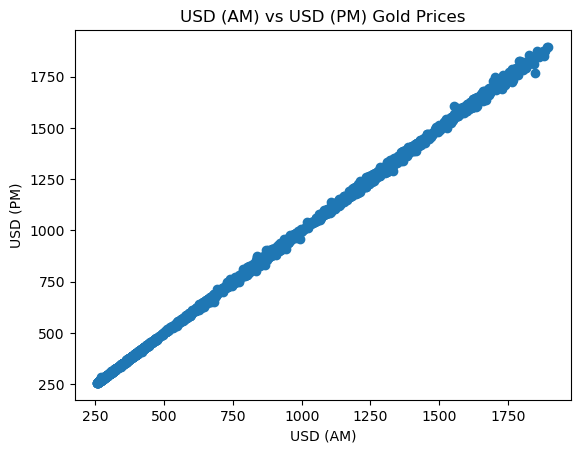

In [10]:
plt.figure()
plt.scatter(df["USD (AM)"], df["USD (PM)"])
plt.xlabel("USD (AM)")
plt.ylabel("USD (PM)")
plt.title("USD (AM) vs USD (PM) Gold Prices")
plt.show()

**_GBP sabah fiyatı ile USD öğleden sonra fiyatı arasındaki ilişkiyi görselleştirelim_**

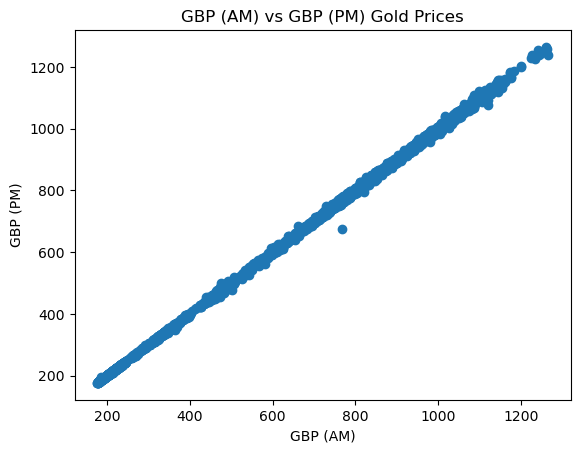

In [11]:
plt.figure()
plt.scatter(df["GBP (AM)"], df["GBP (PM)"])
plt.xlabel("GBP (AM)")
plt.ylabel("GBP (PM)")
plt.title("GBP (AM) vs GBP (PM) Gold Prices")
plt.show()

**_EURO sabah fiyatı ile USD öğleden sonra fiyatı arasındaki ilişkiyi görselleştirelim_**

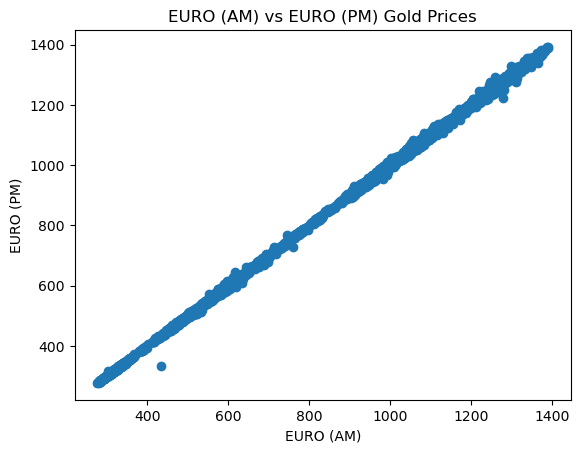

In [12]:
plt.figure()
plt.scatter(df["EURO (AM)"], df["EURO (PM)"])
plt.xlabel("EURO (AM)")
plt.ylabel("EURO (PM)")
plt.title("EURO (AM) vs EURO (PM) Gold Prices")
plt.show()

**_Tarihe Göre Ortalama EURO Fiyatı_**

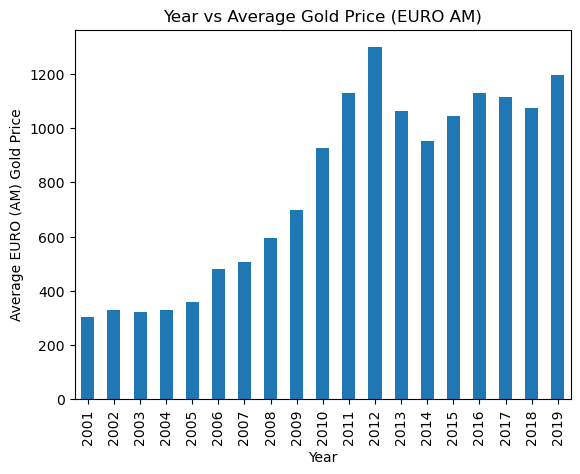

In [13]:
plt.figure()
df.groupby(df["Date"].str[:4])["EURO (AM)"].mean().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Average EURO (AM) Gold Price")
plt.title("Year vs Average Gold Price (EURO AM)")
plt.show()

**_Tarihe Göre Ortalama USD Fiyatı_**

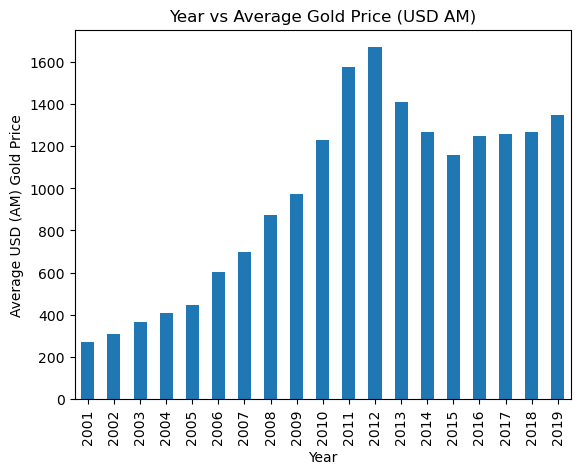

In [14]:
plt.figure()
df.groupby(df["Date"].str[:4])["USD (AM)"].mean().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Average USD (AM) Gold Price")
plt.title("Year vs Average Gold Price (USD AM)")
plt.show()

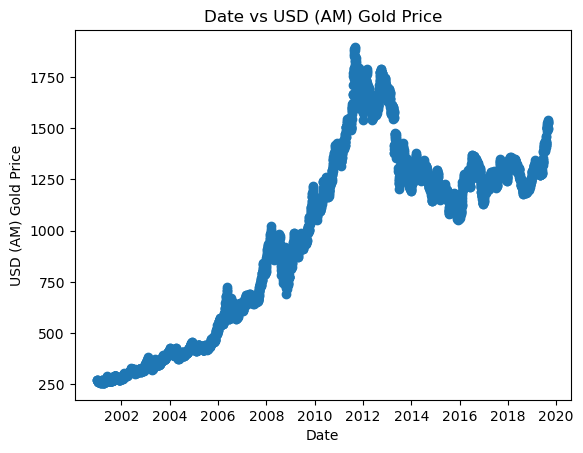

In [15]:
plt.figure()
plt.scatter(pd.to_datetime(df["Date"]), df["USD (AM)"])
plt.xlabel("Date")
plt.ylabel("USD (AM) Gold Price")
plt.title("Date vs USD (AM) Gold Price")
plt.show()

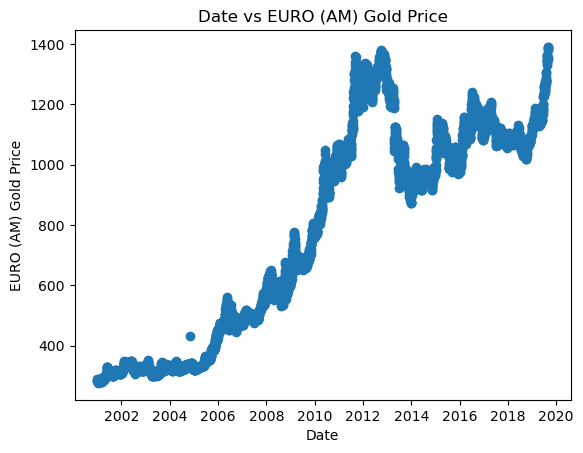

In [16]:
plt.figure()
plt.scatter(pd.to_datetime(df["Date"]), df["EURO (AM)"])
plt.xlabel("Date")
plt.ylabel("EURO (AM) Gold Price")
plt.title("Date vs EURO (AM) Gold Price")
plt.show()

_**Correlation Heatmap**_

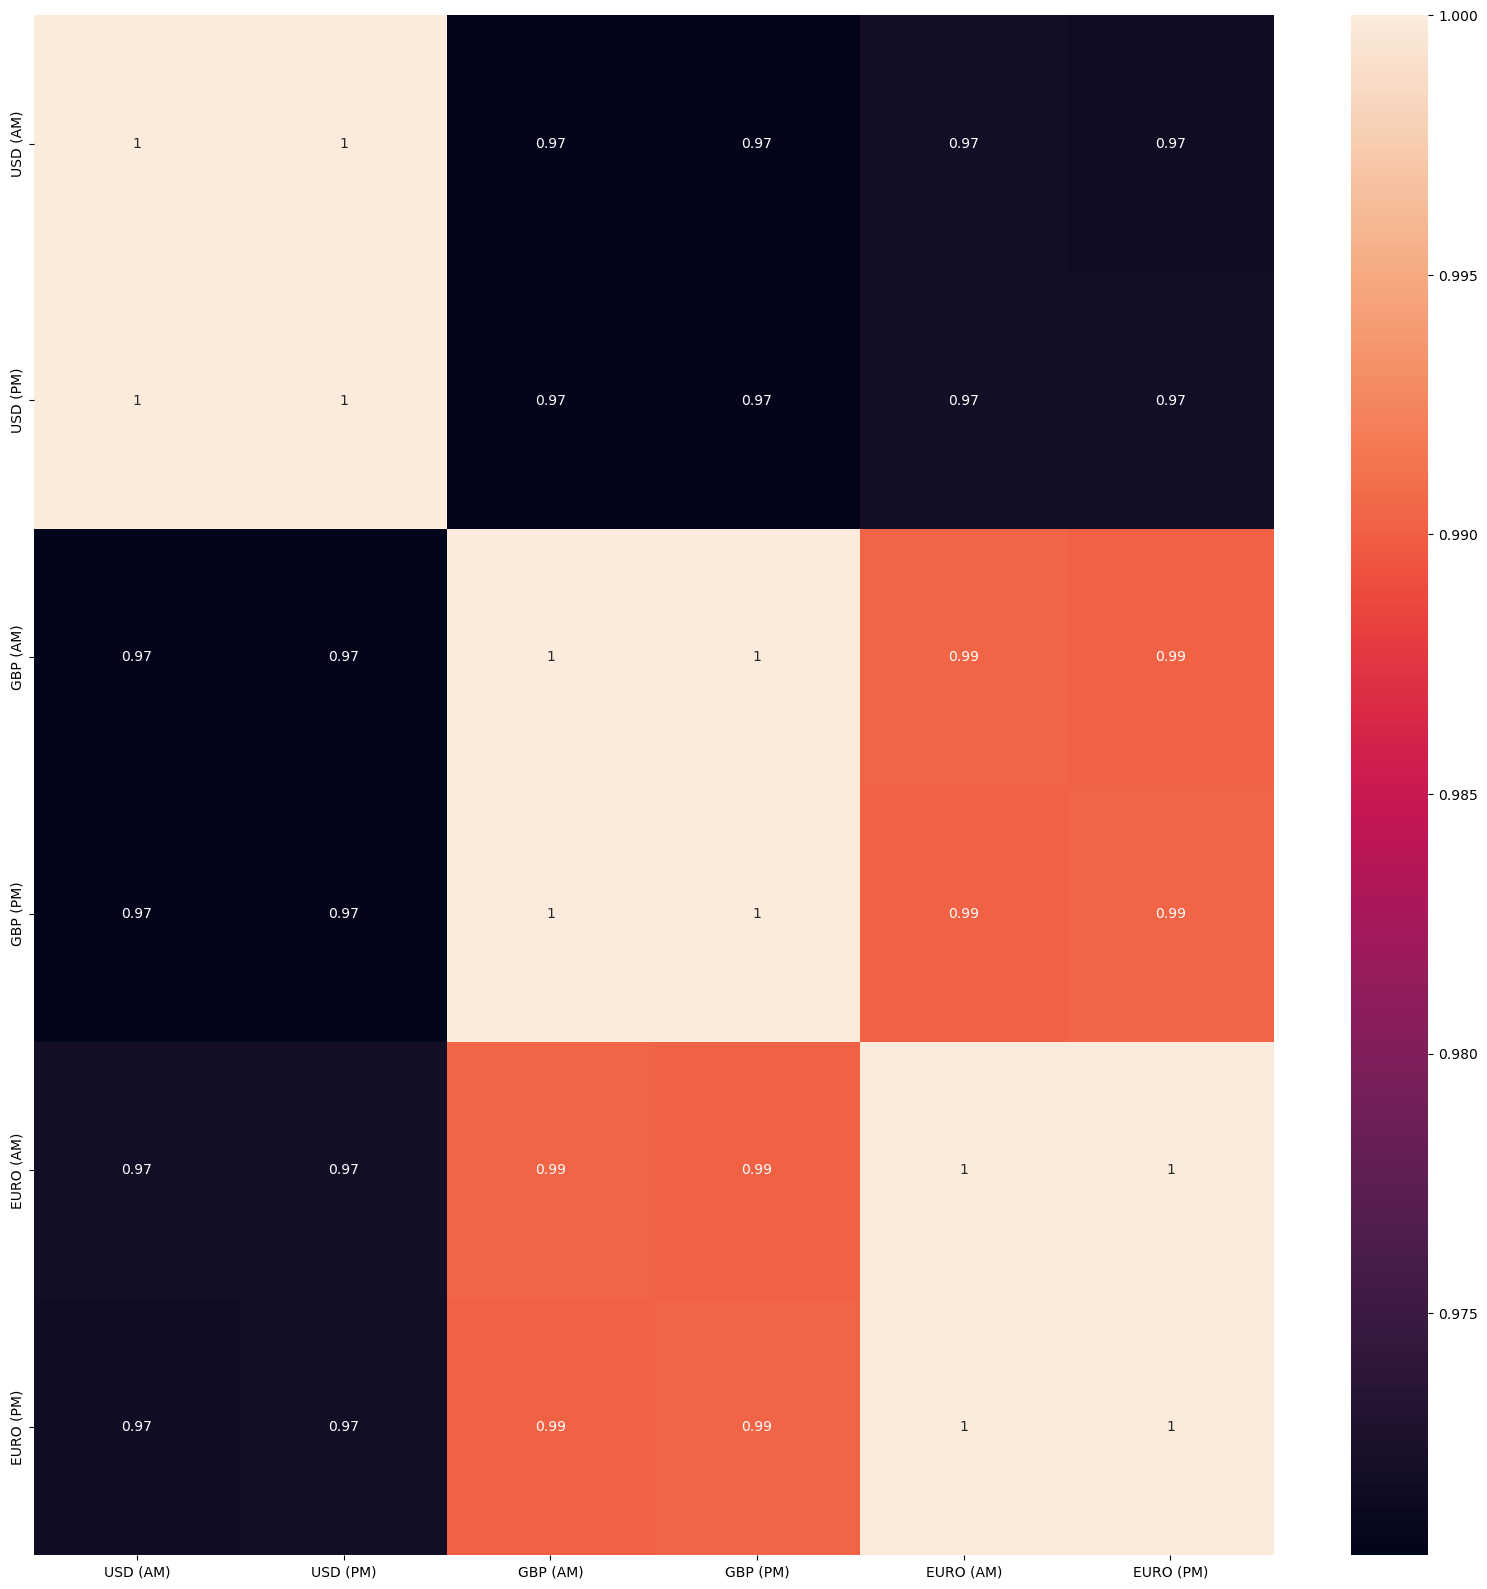

In [17]:
plt.figure(figsize=(20, 20))  

# Grafik boyutlarını ayarlamak için kullanılır. Burada 20x20 inçlik bir boyut belirlenmiş.

sns.heatmap(df.corr(numeric_only=True), annot=True); 
 
# Veri setindeki sayısal sütunlar arasındaki korelasyon matrisini ısı haritası olarak görselleştirir.
# annot=True parametresi, her hücreye korelasyon değerini yazdırır.

**_'USD (PM)' sütunu ile diğer sayısal sütunlar arasındaki korelasyonları alır_**

In [18]:
abs(df.corr(numeric_only=True)['USD (PM)'].sort_values(ascending=False))

# 'USD (PM)' sütunu ile diğer sayısal sütunlar arasındaki korelasyonları hesaplar.
# corr(numeric_only=True) sadece sayısal sütunları dikkate alır.
# abs() fonksiyonu, negatif korelasyonları pozitif hale getirir (mutlak değer alır).
# sort_values(ascending=False) korelasyonları büyükten küçüğe sıralar.
# Bu sayede 'USD (PM)' altın fiyatı ile en güçlü ilişkiye sahip
# diğer para birimleri ve fiyatlar kolayca görülebilir.

USD (PM)     1.000000
USD (AM)     0.999892
EURO (PM)    0.971826
EURO (AM)    0.971739
GBP (PM)     0.970444
GBP (AM)     0.970400
Name: USD (PM), dtype: float64

**_Extreme EURO (PM)’ları gösterir_**

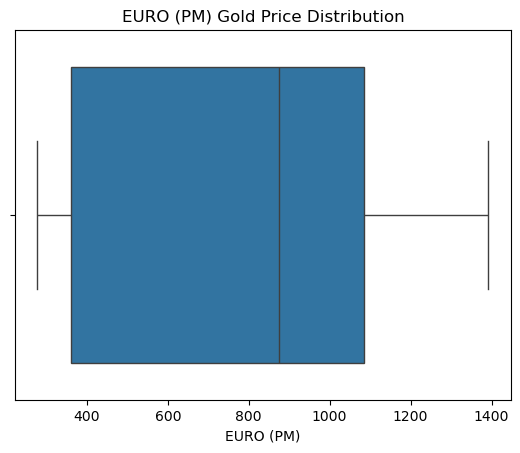

In [19]:
plt.figure()
sns.boxplot(x=df["EURO (PM)"])
plt.title("EURO (PM) Gold Price Distribution")
plt.show()

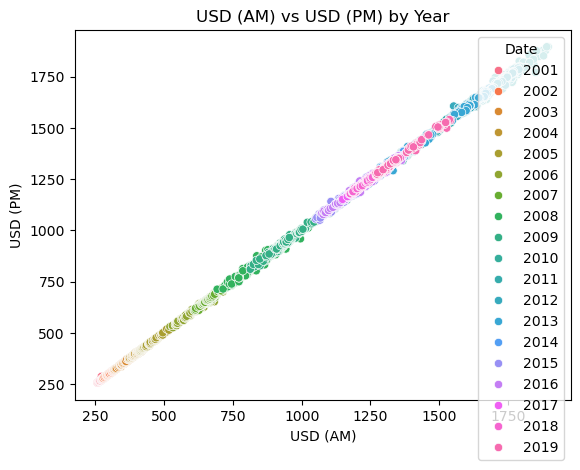

In [20]:
plt.figure()
sns.scatterplot(
    data=df,
    x="USD (AM)",
    y="USD (PM)",
    hue=df["Date"].str[:4]
)
plt.title("USD (AM) vs USD (PM) by Year")
plt.show()

## _Handling Missing Values_

In [21]:
df.isnull().sum()  
# Hangi sütunlarda kaç tane eksik (null) değer olduğunu sayar.

Date          0
USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

In [22]:
df[["USD (PM)", "GBP (PM)", "EURO (PM)"]] = df[["USD (PM)", "GBP (PM)", "EURO (PM)"]].fillna(method="ffill")
# PM verisi yoksa → bir önceki günün PM değeri
# Trend bozulmaz

In [23]:
# Kontrol
df.isnull().sum()

Date         0
USD (AM)     0
USD (PM)     0
GBP (AM)     0
GBP (PM)     0
EURO (AM)    0
EURO (PM)    0
dtype: int64

## _Feature Engineering_

In [24]:
df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["DayOfWeek"] = df["Date"].dt.dayofweek
# Altın fiyatları aylara, yıllara ve haftanın günlerine göre farklı davranabilir.

In [25]:
df["USD_Change"] = df["USD (PM)"] - df["USD (AM)"]
df["GBP_Change"] = df["GBP (PM)"] - df["GBP (AM)"]
df["EURO_Change"] = df["EURO (PM)"] - df["EURO (AM)"]
# Gün içi volatiliteyi yakalar.

In [26]:
df["USD_Return"] = df["USD (PM)"].pct_change()
df["GBP_Return"] = df["GBP (PM)"].pct_change()
df["EURO_Return"] = df["EURO (PM)"].pct_change()
# Modeli trendlere duyarlı yapar.

In [27]:
df["USD_MA_7"] = df["USD (PM)"].rolling(window=7).mean()
df["USD_MA_30"] = df["USD (PM)"].rolling(window=30).mean()
# Hareketli Ortalamalar (Rolling Mean)

In [28]:
df = df.dropna() # Oluşan NaN’leri Temizleme

In [29]:
df = df.drop("Date", axis=1)
# Date Sütununu DataFrame’den Silme

In [30]:
df.isnull().sum() # kontrol

USD (AM)       0
USD (PM)       0
GBP (AM)       0
GBP (PM)       0
EURO (AM)      0
EURO (PM)      0
Year           0
Month          0
Day            0
DayOfWeek      0
USD_Change     0
GBP_Change     0
EURO_Change    0
USD_Return     0
GBP_Return     0
EURO_Return    0
USD_MA_7       0
USD_MA_30      0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4689 entries, 29 to 4717
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   USD (AM)     4689 non-null   float64
 1   USD (PM)     4689 non-null   float64
 2   GBP (AM)     4689 non-null   float64
 3   GBP (PM)     4689 non-null   float64
 4   EURO (AM)    4689 non-null   float64
 5   EURO (PM)    4689 non-null   float64
 6   Year         4689 non-null   int32  
 7   Month        4689 non-null   int32  
 8   Day          4689 non-null   int32  
 9   DayOfWeek    4689 non-null   int32  
 10  USD_Change   4689 non-null   float64
 11  GBP_Change   4689 non-null   float64
 12  EURO_Change  4689 non-null   float64
 13  USD_Return   4689 non-null   float64
 14  GBP_Return   4689 non-null   float64
 15  EURO_Return  4689 non-null   float64
 16  USD_MA_7     4689 non-null   float64
 17  USD_MA_30    4689 non-null   float64
dtypes: float64(14), int32(4)
memory usage: 622.8 KB


## _Save Data_

In [32]:
df.to_csv("cleaned_gold_price_data.csv", index=False)

## _Summary_

_Bu projede kullanılan veri seti, farklı para birimleri cinsinden açıklanan altın fiyatlarını içermektedir. Veri seti toplam 4.689 gözlem ve 18 sayısal değişkenden oluşmaktadır. Tarih değişkeninden türetilen zaman bazlı özellikler çıkarıldıktan sonra, modelleme aşamasında kullanılmak üzere veri seti tamamen sayısal hale getirilmiştir._

_Eksik değerler yalnızca öğleden sonra (PM) fiyatlarında sınırlı sayıda bulunmuş ve zaman serisi yapısı korunarak uygun yöntemlerle doldurulmuştur. Ardından, veri seti zenginleştirilmiş; yıl, ay, gün ve haftanın günü gibi zaman özellikleri oluşturulmuştur. Gün içi fiyat değişimleri (AM–PM farkları), günlük getiriler (percentage change) ve kısa–orta vadeli trendleri yakalayabilmek adına hareketli ortalamalar eklenmiştir._

_Uygulanan feature engineering adımları sayesinde veri seti, altın fiyatlarındaki volatiliteyi, trendleri ve dönemsel davranışları daha iyi temsil edebilir hale getirilmiştir. Tüm bu işlemler sonucunda veri seti, makine öğrenmesi modelleri için eksiksiz, temiz ve analiz edilebilir bir yapıya kavuşturulmuştur._